
### Problem Statement 
Our team aims to build a classifier model to predict the presence of West Nile Virus in Chicago supporting the Chicago Department of Public Health in its prevention efforts and control activities while also educating the general public and health care providers, enabling the Chicago Department of Public Health to effectively plan and manage their resources in preventing West Nile Virus. 

Kaggle https://www.kaggle.com/c/predict-west-nile-virus/ 


### Data Cleaning 
- Weather Dataset 
- Spray Dataset
- Training Dataset
- Test Dataset


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime

from sklearn.cluster import DBSCAN,KMeans
import plotly.express as px

In [ ]:
df_weather = pd.read_csv('/datasets/data/weather.csv')
df_spray = pd.read_csv('/datasets/data/spray.csv')
df_train = pd.read_csv('/datasets/data/train.csv')

df_test = pd.read_csv('/datasets/data/test.csv')

## Weather Dataset


In [ ]:
#checking the size of the data for weather
df_weather.shape 

(2944, 22)

In [ ]:
#check whether there is null values
df_weather.isnull().sum() 

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [ ]:
df_weather


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45,M,34,42,20,0,...,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,...,,0,M,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,M,35,42,20,0,...,RA,M,M,M,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,...,RA SN,0,M,0.1,0.03,29.49,30.20,22.6,34,22.9


Identified that two stations took the reading on the same date, we will be creating clustering of the stations together with the dataset and allocate the weather information according to the clusters

In [ ]:
#Replace "M" & "-" as null value (because they are missing data) and "  T" as 0.001 (because T is insignificant value i.e 0.00001)
df_weather = df_weather.replace("M", np.nan).replace("-", np.nan).replace("  T",0.001) 


#filling up null value with above value in other to get the mean value for grouping purpose in the later part
df_weather.fillna(method='ffill', inplace=True) #fill nan with above values as they belongs to the same date
df_weather

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,14,51,57,0,3,...,,0,NaN,0.0,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,-3,42,47,13,0,...,BR HZ,0,NaN,0.0,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45,-4,34,42,20,0,...,,0,NaN,0.0,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,...,,0,NaN,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,-4,35,42,20,0,...,RA,0,NaN,0.0,0.001,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,...,RA SN,0,NaN,0.1,0.03,29.49,30.20,22.6,34,22.9


In [ ]:
#changing columns type to the intented data type for better analysis
df_weather = df_weather.astype({'Tavg':'float64','Depart':'float64','WetBulb':'float64','Heat':'float64','Cool':'float64','SnowFall':'float64','PrecipTotal':'float64','StnPressure':'float64','SeaLevel':'float64','AvgSpeed':'float64'})
#changing "Date" as datetime type
df_weather['Date'] = df_weather[['Date']].astype('datetime64[ns]')
df_weather


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,...,,0,NaN,0.0,0.000,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,14.0,51,57.0,0.0,3.0,...,,0,NaN,0.0,0.000,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,...,BR,0,NaN,0.0,0.000,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,-3.0,42,47.0,13.0,0.0,...,BR HZ,0,NaN,0.0,0.000,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,...,,0,NaN,0.0,0.000,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45.0,-4.0,34,42.0,20.0,0.0,...,,0,NaN,0.0,0.000,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42.0,-4.0,34,40.0,23.0,0.0,...,,0,NaN,0.0,0.000,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45.0,-4.0,35,42.0,20.0,0.0,...,RA,0,NaN,0.0,0.001,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40.0,-6.0,25,33.0,25.0,0.0,...,RA SN,0,NaN,0.1,0.030,29.49,30.20,22.6,34,22.9


In [ ]:
#convert datetime to Month name
df_weather['Month'] = df_weather['Date'].dt.month_name()
df_weather

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Month
0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,...,0,NaN,0.0,0.000,29.10,29.82,1.7,27,9.2,May
1,2,2007-05-01,84,52,68.0,14.0,51,57.0,0.0,3.0,...,0,NaN,0.0,0.000,29.18,29.82,2.7,25,9.6,May
2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,...,0,NaN,0.0,0.000,29.38,30.09,13.0,4,13.4,May
3,2,2007-05-02,60,43,52.0,-3.0,42,47.0,13.0,0.0,...,0,NaN,0.0,0.000,29.44,30.08,13.3,2,13.4,May
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,...,0,NaN,0.0,0.000,29.39,30.12,11.7,7,11.9,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45.0,-4.0,34,42.0,20.0,0.0,...,0,NaN,0.0,0.000,29.42,30.07,8.5,29,9.0,October
2940,1,2014-10-30,51,32,42.0,-4.0,34,40.0,23.0,0.0,...,0,NaN,0.0,0.000,29.34,30.09,5.1,24,5.5,October
2941,2,2014-10-30,53,37,45.0,-4.0,35,42.0,20.0,0.0,...,0,NaN,0.0,0.001,29.41,30.10,5.9,23,6.5,October
2942,1,2014-10-31,47,33,40.0,-6.0,25,33.0,25.0,0.0,...,0,NaN,0.1,0.030,29.49,30.20,22.6,34,22.9,October


Dropping unnecessary column to fine tune relevancy for analysis: <br>
Tmax & Tmin --> will be using average temp instead for data engineering <br>
Heat & Cool --> both factors are irrelevant as they are used to calculate energy used <br>

In [ ]:
df_weather.drop(columns=['Tmax','Tmin','Heat','Cool'], inplace=True)

In [ ]:
df_weather.to_csv("/datasets/data/cleaned_weather.csv", index=False)

## Spray Dataset

In [ ]:

#show sample  spray data
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [ ]:
pd.DatetimeIndex(df_spray['Date']).year.value_counts()

2013    12626
2011     2209
Name: Date, dtype: int64

In [ ]:
#checking data types
df_spray.dtypes

Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object

In [ ]:
#how many data poitns
df_spray.shape

(14835, 4)

In [ ]:
#chek how many are NULLs
df_spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [ ]:
# Change date to date time 
df_spray['Date'] = pd.to_datetime(df_spray['Date'])

In [ ]:
#Time has null values
df_spray.loc[df_spray["Time"].isnull()]

 #2011-09-07 has null time

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014
...,...,...,...,...
1609,2011-09-07,NaN,41.995876,-87.811615
1610,2011-09-07,NaN,41.995972,-87.810271
1611,2011-09-07,NaN,41.995684,-87.810319
1612,2011-09-07,NaN,41.994724,-87.810415


In [ ]:
#are there any duplicates?
df_spray.duplicated().sum()

541

In [ ]:
# lets check for the details on the duplicates

df_spray[df_spray.duplicated() == True]

#looks like almost  all are  "2011-09-07 @7:44:32 PM"

,Date,Time,Latitude,Longitude
485,2011-09-07,7:43:40 PM,41.983917,-87.793088
490,2011-09-07,7:44:32 PM,41.986460,-87.794225
491,2011-09-07,7:44:32 PM,41.986460,-87.794225
492,2011-09-07,7:44:32 PM,41.986460,-87.794225
493,2011-09-07,7:44:32 PM,41.986460,-87.794225
...,...,...,...,...
1025,2011-09-07,7:44:32 PM,41.986460,-87.794225
1026,2011-09-07,7:44:32 PM,41.986460,-87.794225
1027,2011-09-07,7:44:32 PM,41.986460,-87.794225
1028,2011-09-07,7:44:32 PM,41.986460,-87.794225


In [ ]:
#lets drop the duplicates 
df_spray.drop_duplicates(inplace=True)

In [ ]:
#final data count
df_spray.shape

(14294, 4)

In [ ]:
#after removing duplicates on the data
#any duplicate Spray on the same Date and Location (multiple Times per Day)
df_tmp = df_spray.groupby(by=["Date","Latitude", "Longitude"]).count()
df_tmp[df_tmp['Time'] > 1]

#none!

,,,Time
Date,Latitude,Longitude,


In [ ]:
#just drop the time 
#looks like there is only one spray per Day per Location, we can drop the Time
df_spray.drop(columns="Time", inplace=True)

In [ ]:
df_spray.head()

,Date,Latitude,Longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858


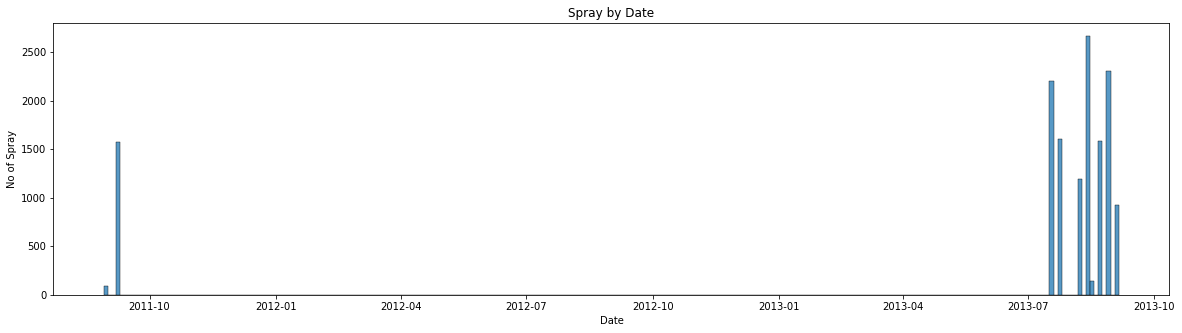

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(df_spray["Date"])
plt.xlabel('Date')
plt.ylabel('No of Spray')
plt.title("Spray by Date")
plt.show();

***only 2 days of Spray in 2011 and 8 days of spray in 2013***

In [ ]:

df_spray.to_csv("/datasets/data/cleaned_spray.csv", index=False)

## Training Dataset

In [ ]:
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [ ]:
df_train.shape

(10506, 12)

In [ ]:
#check for null values 
df_train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [ ]:
df_train

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0


In [ ]:
df_train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

#### Changing the data type for Date column

In [ ]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [ ]:
df_train.dtypes

Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object

#### Check for duplicates in the data

In [ ]:
df_train[df_train.duplicated(keep=False)]
#df_train.duplicated()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
293,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
350,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2013-09-06,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,1
10259,2013-09-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0
10262,2013-09-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0
10391,2013-09-19,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,13,0


There are quite a number of duplicates in the data. This is due to the limits in data collection, the number of mosquitoes captured for each row seems to be limited to 50. However, this happened because address were dropped previously. In other words, it happened to have 50 mosquitoes in different address. Thus, there is a need to sum it up at the later part. 

#### Presence of West Nile Virus

In [ ]:
df_train['WnvPresent'].value_counts(normalize=True)

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

The training data collected in 2007, 2009, 2011 and 2013 showed 94.75% of no West Nile Virus present in mosquitoes and and 5.24% with West Nile Virus present. 

### Presence of West Nile Virus (2007 - 2013)

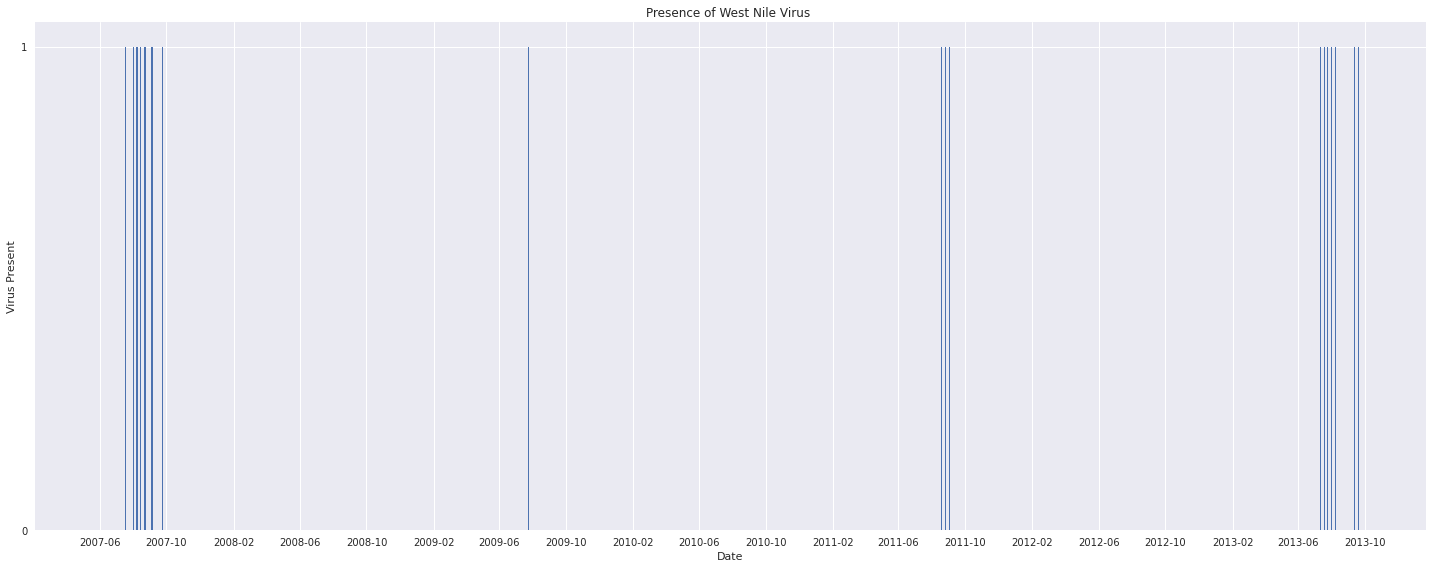

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(20, 8))

ax.bar(df_train['Date'],
       df_train['WnvPresent'],)

ax.set(xlabel="Date",
       ylabel="Virus Present",
       title="Presence of West Nile Virus ")

date_form = DateFormatter("%m-%y")
ax.set_yticks([0,1])
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 4))
plt.tight_layout()
plt.show()

The training data reflected the seasonality of the virus, with the virus being present between July and October. There were some exceptions with the virus not present in certain years - 2008, 2010, 2012. The training data set consists of data from 2007, 2009, 2011 and 2013. 

### Presence of West Nile Virus in traps - Month

In [ ]:
df_train['year'] = df_train['Date'].dt.year
df_train['month'] = df_train['Date'].dt.month

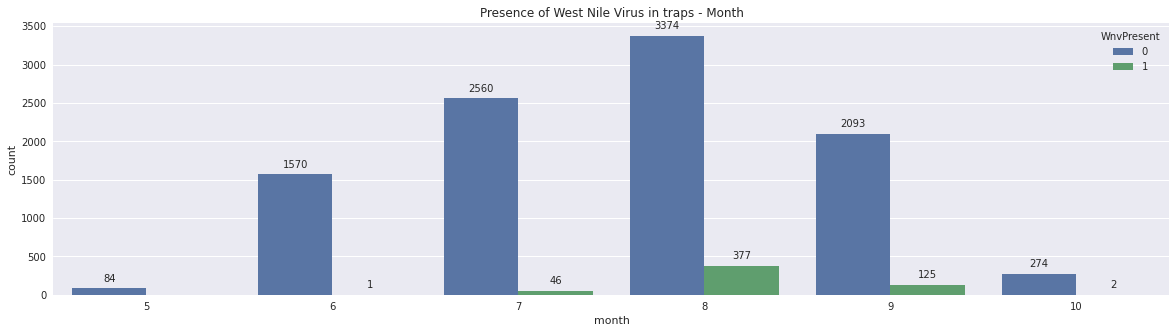

In [ ]:
plt.figure(figsize=(20,5))

splot = sns.countplot(data = df_train, x = 'month', hue='WnvPresent')
plt.title('Presence of West Nile Virus in traps - Month')


for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Delving deeper within the specific months, it was noticed that West Nile Virus is present within mosquitoes during July, August and September. With a higher numbers of West Nile Virus present in mosquitoes in August as compared to July and September. 

The data within the training set also reaffirmed the collection process in which mosquito traps being scattered across the city from May to October. 

### Presence of West Nile Virus in traps - Year

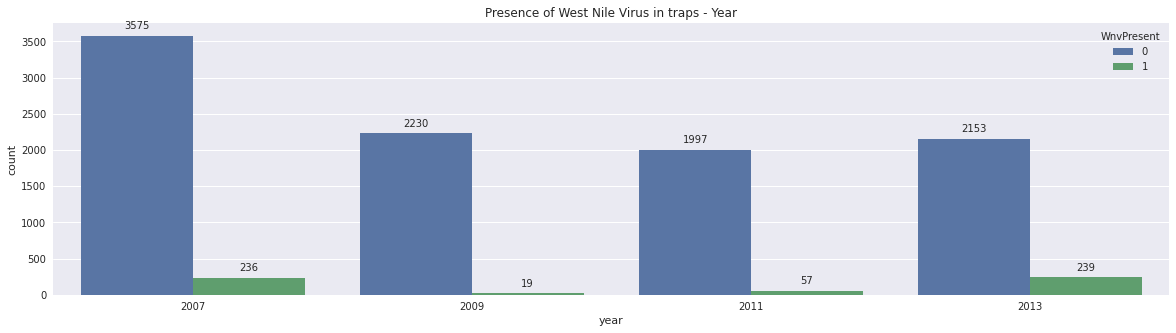

In [ ]:
plt.figure(figsize=(20,5))

splot = sns.countplot(data = df_train, x = 'year', hue = 'WnvPresent')
plt.title('Presence of West Nile Virus in traps - Year')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Breaking down within the specific years, we were able to notice that 2007 and 2013 saw higher cases of mosquitoes with West Nile Virus present, with 200 more cases while 2009 and 2013 saw less than 60 cases. 

Comparing the training dataset with the spray data set, we were able to notice while frequency of sprays were much higher in 2013 as compared to 2011, the number of traps with mosquitoes carrying West Nile Virus is 4 times higher than 2011. 

### Types of Mosquitoes captured in traps

In [ ]:
df_train['Species'].value_counts(normalize=True)

CULEX PIPIENS/RESTUANS    0.452313
CULEX RESTUANS            0.260803
CULEX PIPIENS             0.256901
CULEX TERRITANS           0.021131
CULEX SALINARIUS          0.008186
CULEX TARSALIS            0.000571
CULEX ERRATICUS           0.000095
Name: Species, dtype: float64

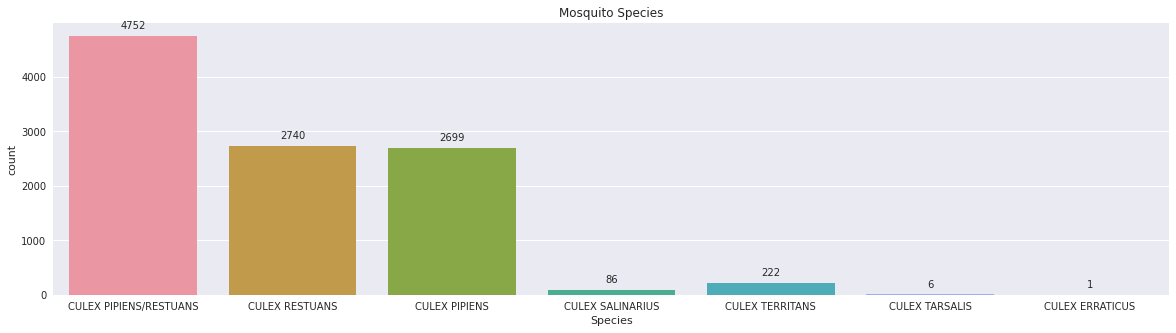

In [ ]:
plt.figure(figsize=(20,5))

splot = sns.countplot(data = df_train, x = 'Species')
plt.title('Mosquito Species')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Out of the 6 different mosquito species caught within the traps in 2007, 2009, 2011 and 2013,  45.23% of cases included mosquitoes that were Culex Pipens/ Restuans (combination of both Culex Restuans & Culex Pipiens), followed by Culex Restuans (26.08%) and Culex Pipiens (25.69%). 

Next, we will be exploring whether certain species are more likely to carrying the West Nile Virus. 

### Counts of traps with mosquitoes carrying West Nile Virus

In [ ]:
train_present = df_train.loc[df_train['WnvPresent']==1]
train_present

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,year,month
553,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,38,E 115TH ST,T215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,50,1,2007,7
603,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1,2007,7
611,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1,2007,7
618,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1,2007,7
660,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1,2007,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10388,2013-09-19,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,27,1,2013,9
10439,2013-09-26,"4600 Milwaukee Avenue, Chicago, IL 60630, USA",CULEX PIPIENS,46,N MILWAUKEE AVE,T003,"4600 N MILWAUKEE AVE, Chicago, IL",41.964242,-87.757639,8,3,1,2013,9
10462,2013-09-26,"6300 West 64th Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,63,W 64TH ST,T155,"6300 W 64TH ST, Chicago, IL",41.776156,-87.778927,9,4,1,2013,9
10484,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,39,1,2013,9


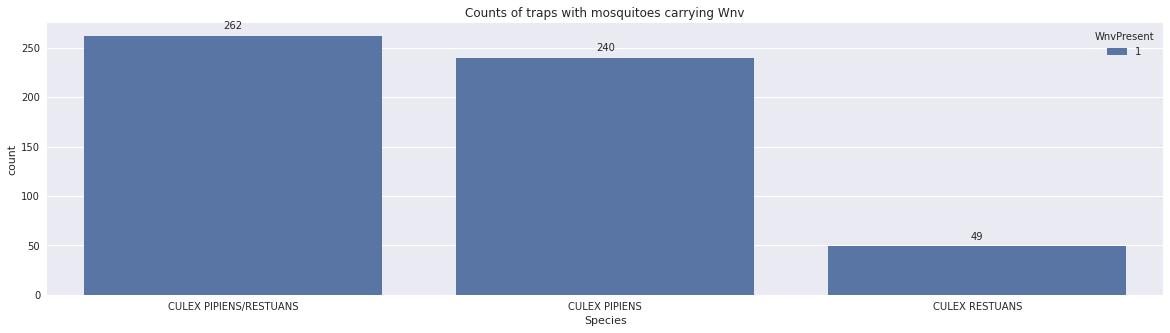

In [ ]:
plt.figure(figsize=(20,5))

splot = sns.countplot(data = train_present, x = 'Species', hue='WnvPresent')
plt.title('Counts of traps with mosquitoes carrying Wnv')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Species tested carrying the West Nile Virus are primarily three main species - Culex Pipiens/Restuans, Culex Pipiens and Culex Restuans

### Counts of species captured in traps over the years

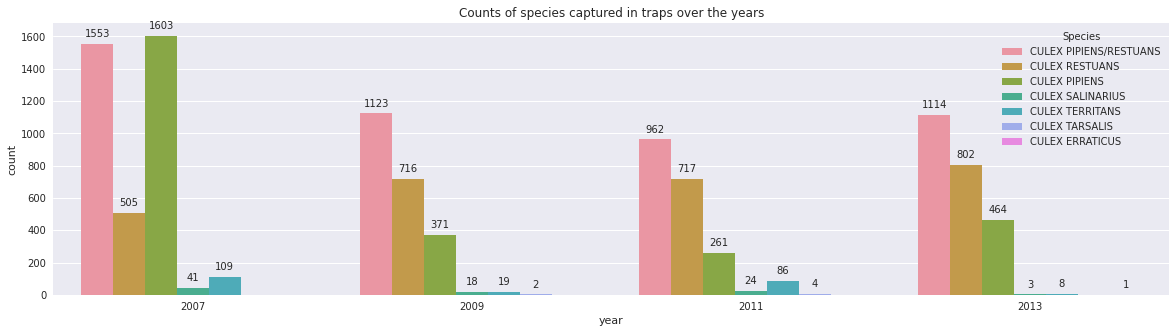

In [ ]:
plt.figure(figsize=(20,5))

splot = sns.countplot(data = df_train, x = 'year', hue = 'Species')
plt.title('Counts of species captured in traps over the years')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Culex Pipiens/ Resturans, Culex Restuans and Culex Pipiens were the two main species seen in the training dataset. This was seen with these three species taking up the bulk of the number of cases of mosquitoes captured in traps in 2007, 2009, 2011 and 2013. 


2007 saw Culex Pipiens taking up 42% of traps sampled with mosquitoes caught. However in 2009, 2011 and 2013, Culex Pipiens/Restuans represented the bulk of the traps sampled - (49.93% in 2009, 46.83% in 2011 and 46.59% in 2013). Furthermore, the number of traps has decreased, 2009, 2011 and 2013 reported less traps as compared to 2007. 

### Sum of Mosquitoes (Year, Month)

In [ ]:
mos_yearmth = df_train.groupby(['year', 'month'])['NumMosquitos'].agg(['sum'])
mos_yearmth

sum
year month       
2007 5         40
     6        428
     7       7199
     8      40015
     9       9300
     10      1706
2009 5        190
     6       7390
     7       8833
     8       2346
     9       2137
     10       212
2011 6       4049
     7       8445
     8       2968
     9       3337
2013 6       4711
     7      12771
     8      12707
     9       6255

In [ ]:
mos_year = df_train.groupby(['year'])['NumMosquitos'].agg(['sum'])
mos_year

,sum
year,
2007,58688
2009,21108
2011,18799
2013,36444


Text(0.5, 1.0, 'Total sum of mosquitoes by Year, Month')

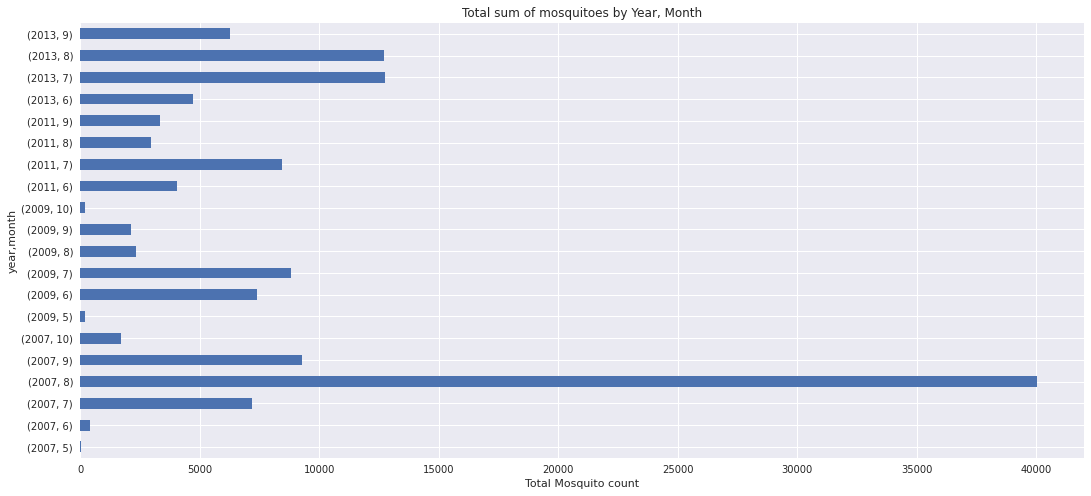

In [ ]:
plt.figure(figsize=(18, 8))
mos_yearmth['sum'].plot(kind="barh")
plt.xlabel('Total Mosquito count')
plt.title('Total sum of mosquitoes by Year, Month')

August 2007 saw the highest number of mosquitoes caught with more than 40,000 mosquitoes followed by july and august 2013 with more than 12,000 mosquitoes caught. 

In [ ]:
sss = df_train.groupby(['year', 'month', 'Species','WnvPresent'], as_index=False).agg({'NumMosquitos': 'sum'})
sss

,year,month,Species,WnvPresent,NumMosquitos
0,2007,5,CULEX PIPIENS,0,1
1,2007,5,CULEX PIPIENS/RESTUANS,0,10
2,2007,5,CULEX RESTUANS,0,29
3,2007,6,CULEX PIPIENS,0,20
4,2007,6,CULEX PIPIENS/RESTUANS,0,121
...,...,...,...,...,...
120,2013,9,CULEX PIPIENS,1,771
121,2013,9,CULEX PIPIENS/RESTUANS,0,2090
122,2013,9,CULEX PIPIENS/RESTUANS,1,911
123,2013,9,CULEX RESTUANS,0,191


In [ ]:
cols = ['year', 'month']
sss['year_month'] = sss[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
sss.head()

,year,month,Species,WnvPresent,NumMosquitos,year_month
0,2007,5,CULEX PIPIENS,0,1,2007_5
1,2007,5,CULEX PIPIENS/RESTUANS,0,10,2007_5
2,2007,5,CULEX RESTUANS,0,29,2007_5
3,2007,6,CULEX PIPIENS,0,20,2007_6
4,2007,6,CULEX PIPIENS/RESTUANS,0,121,2007_6


### Sum of Mosquitoes (Year, Month) by Species

Text(0.5, 1.0, 'Sum of mosquitoes by species')

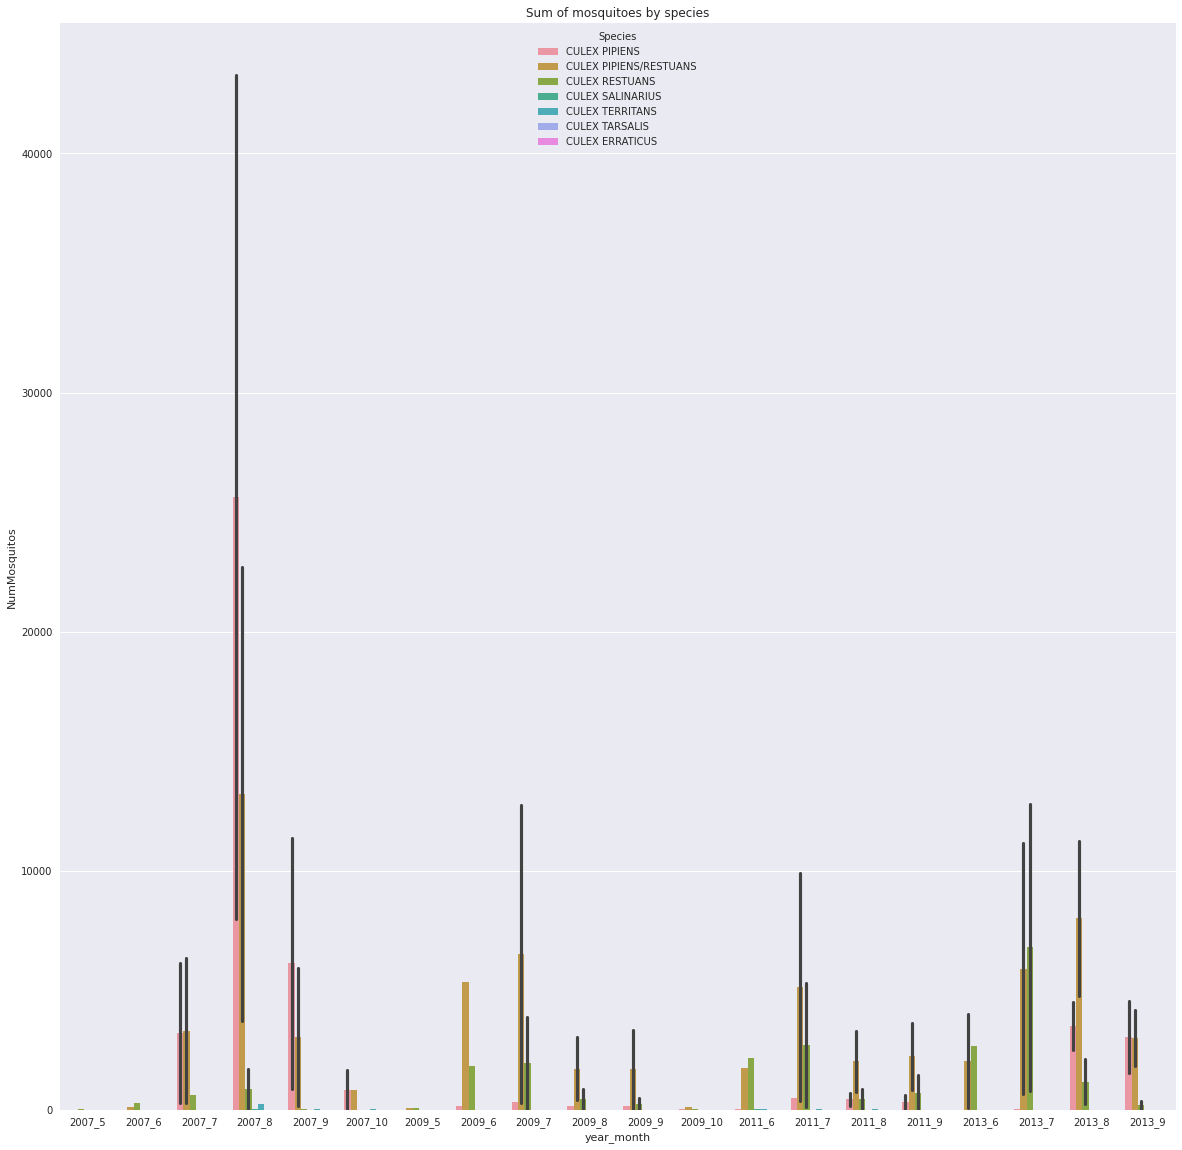

In [ ]:
plt.figure(figsize=(20, 20))
sns.barplot(x="year_month", y="NumMosquitos", data=sss, hue = 'Species', estimator=sum)
plt.title('Sum of mosquitoes by species')

In August 2007, more than 25,000 Culex Pipens was caught, which was 10,000 more than the next highest number of mosquito species (Culex Pipiens/Restuans) caught in the same month. 

Taking a closer look at the specific years- it was noticed that in 2009, majority of species caught were Culux Pipiens and Culux Pipiens/Restuans. In 2009 and 2011 and 2013(june, july) , majority of species caught belonged to Culex Pipiens/Restuans and Culex Restuans while in August and September 2013, majority of species caught were Culex Pipiens and Culex Pipens/Restuans.

### Traps

In [ ]:
trap_count = df_train['Trap'].nunique()

print( f"There are {trap_count} unique number of traps in the training dataset")

There are 136 unique number of traps in the training dataset


In [ ]:
trap_present = train_present.groupby('Trap')['NumMosquitos'].agg(['sum','count'])
trap_present.index.name = 'Trap'

In [ ]:

top_10 = trap_present.sort_values(by="sum", ascending=False).head(10)
#top_10

#### Visualizing the count of traps with presence of West Nile Virus in mosquitoes

Text(0.5, 1.0, 'Count of traps with wnv present in mosquitoes')

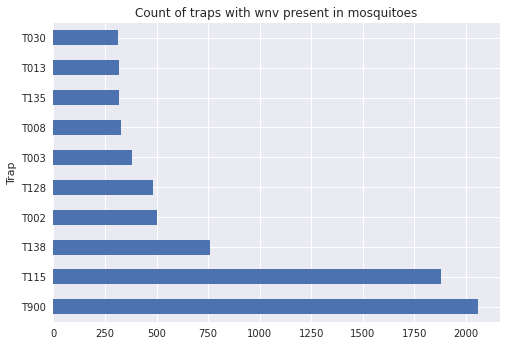

In [ ]:
top_10['sum'].plot(kind="barh")
plt.title('Count of traps with wnv present in mosquitoes')

The top 2 Traps with the highest count of mosquitoes with west nile virus are T900 and T115, with more than 1750 counts.

### Addressing 50 mosquitoes per row limit

Pulling up duplicate rows with the same date, species and location. 


In [ ]:
#Filtering rows that are duplicated based on these columns - Date, Species, Latitude, Longitude and WnvPresent
df_train.loc[df_train.duplicated(subset=['Date', 'Species', 'Latitude', 'Longitude','WnvPresent'], keep=False)]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,year,month
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0,2007,6
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0,2007,6
280,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,7
281,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,2,0,2007,7
293,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0,2007,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10443,2013-09-26,"1100 South California Avenue, Chicago, IL 6061...",CULEX PIPIENS/RESTUANS,11,S CALIFORNIA,T047,"1100 S CALIFORNIA, Chicago, IL",41.868142,-87.696269,9,9,0,2013,9
10486,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,16,0,2013,9
10487,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,9,0,2013,9
10488,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,11,0,2013,9


In [ ]:
# grouping every col within the df to remove the duplicated rows

df_train = df_train.groupby([col for col in df_train.columns if col not in ['NumMosquitos']], as_index=False).sum().reindex()


In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.shape

(8610, 14)

In [ ]:
df_train

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,WnvPresent,year,month,NumMosquitos
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,0,2007,5,1
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,0,2007,5,2
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,0,2007,5,1
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,0,2007,5,1
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,0,2007,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,2013-09-26,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,0,2013,9,6
8606,2013-09-26,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,0,2013,9,4
8607,2013-09-26,"South Vincennes Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S VINCENNES,T089,"1000 S VINCENNES, Chicago, IL",41.723195,-87.649970,5,0,2013,9,4
8608,2013-09-26,"University of Illinois at Chicago, 1100 South ...",CULEX PIPIENS/RESTUANS,11,S ASHLAND AVE,T090,"1100 S ASHLAND AVE, Chicago, IL",41.868077,-87.666901,9,0,2013,9,2


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8610 entries, 0 to 8609
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    8610 non-null   datetime64[ns]
 1   Address                 8610 non-null   object        
 2   Species                 8610 non-null   object        
 3   Block                   8610 non-null   int64         
 4   Street                  8610 non-null   object        
 5   Trap                    8610 non-null   object        
 6   AddressNumberAndStreet  8610 non-null   object        
 7   Latitude                8610 non-null   float64       
 8   Longitude               8610 non-null   float64       
 9   AddressAccuracy         8610 non-null   int64         
 10  WnvPresent              8610 non-null   int64         
 11  year                    8610 non-null   int64         
 12  month                   8610 non-null   int64   

### Create cluster for the two weather stations

In [ ]:
#Using block column to identify weather station to mergin into train and test dataset. Lat & Lng given in Kaggle
station = pd.DataFrame(
    {'source':['weather','weather'],'Block':[1,2],'Latitude':[41.995,41.786],
    'Longitude':[-87.933,-87.752]})
df_test['source'] = 'Test'
df_train['source'] = 'Train'
df_spray['source'] = 'spray'
df_cls = pd.concat([df_train,df_test,station,df_spray])

decimals = pd.Series([6, 6], index=['Latitude', 'Longitude'])
df_cls = df_cls.round(decimals)

In [ ]:
df_cls

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,WnvPresent,year,month,NumMosquitos,source,Id
0,2007-05-29 00:00:00,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11.0,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8.0,0.0,2007.0,5.0,1.0,Train,NaN
1,2007-05-29 00:00:00,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11.0,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8.0,0.0,2007.0,5.0,2.0,Train,NaN
2,2007-05-29 00:00:00,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11.0,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8.0,0.0,2007.0,5.0,1.0,Train,NaN
3,2007-05-29 00:00:00,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11.0,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8.0,0.0,2007.0,5.0,1.0,Train,NaN
4,2007-05-29 00:00:00,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15.0,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8.0,0.0,2007.0,5.0,1.0,Train,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14830,2013-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,42.006587,-87.812355,NaN,NaN,NaN,NaN,NaN,spray,NaN
14831,2013-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,42.006192,-87.816015,NaN,NaN,NaN,NaN,NaN,spray,NaN
14832,2013-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,42.006022,-87.817392,NaN,NaN,NaN,NaN,NaN,spray,NaN
14833,2013-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,42.005453,-87.817423,NaN,NaN,NaN,NaN,NaN,spray,NaN


For the first layer of clustering, we are creating clusters to differentiate between the two weather stations.

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)
features = list(df_cls[['Latitude','Longitude']].values)
kmeans.fit(features)
# save results
labels = kmeans.labels_
# send back into dataframe and display it
df_cls['cluster'] = labels
# display the number of mamber each clustering
df_cls['cluster'].value_counts()

0    71105
1    68094
Name: cluster, dtype: int64

### Create another layer of cluster to identify mosquito breeding

The next layer of clustering, we are creating clusters to identify mosquito breeding.

In [ ]:
kmeans_spray = KMeans(
    init="random",
    n_clusters=32,
    n_init=10,
    max_iter=300,
    random_state=42
)
sec_fea = list(df_cls[['Latitude','Longitude']].values)
kmeans_spray.fit(sec_fea)
# save results
label_spray = kmeans_spray.labels_
# send back into dataframe and display it
df_cls['2nd cluster'] = label_spray
# display the number of mamber each clustering
df_cls['2nd cluster'].value_counts()
#Set 2nd cluster as string to dummy creation for later
df_cls['2nd cluster'] = df_cls['2nd cluster'].astype(int)
#create new column to determine number of mosquitoes that has WNV
df_cls['Numwnv'] = df_cls['NumMosquitos']*df_cls['WnvPresent']


In [ ]:
#Tagging the datasets before merging all together for clustering purpose
df_train = df_cls[df_cls['source']== 'Train']
df_spray = df_cls[df_cls['source']== 'spray']
df_test = df_cls[df_cls['source']== 'Test']
df_station =  df_cls[df_cls['source']== 'weather']

In [ ]:
#making sure the clustering is different for each weather stations
df_station

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,WnvPresent,year,month,NumMosquitos,source,Id,cluster,2nd cluster,Numwnv
0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,41.995,-87.933,NaN,NaN,NaN,NaN,NaN,weather,NaN,1,18,NaN
1,NaN,NaN,NaN,2.0,NaN,NaN,NaN,41.786,-87.752,NaN,NaN,NaN,NaN,NaN,weather,NaN,0,13,NaN


In [ ]:
#Merging using Weather['Station Id'] with previously we used df_station['block'] as indicator.
df_weather = pd.merge(df_weather,df_station[['Block','cluster']],left_on='Station',right_on='Block', how='left')
df_weather['cluster'].isnull().sum()

0

In [ ]:
#Drop station and block in weather as we have merged and identified the clustering
df_weather.drop(columns=['Block','Station'],inplace=True)

In [ ]:
#Converting df_train['Date'] into datetime type to enable merging df_train and df_weather using Date and cluster
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_merge = pd.merge(left=df_train, right=df_weather, how="inner", on=["Date","cluster"])
df_merge

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Month
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11.0,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8.0,...,0,NaN,0.0,0.0,29.44,30.09,5.8,16,7.4,May
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11.0,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8.0,...,0,NaN,0.0,0.0,29.44,30.09,5.8,16,7.4,May
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11.0,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8.0,...,0,NaN,0.0,0.0,29.44,30.09,5.8,16,7.4,May
3,2007-05-29,"1700 West 95th Street, Chicago, IL 60643, USA",CULEX RESTUANS,17.0,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9.0,...,0,NaN,0.0,0.0,29.44,30.09,5.8,16,7.4,May
4,2007-05-29,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22.0,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8.0,...,0,NaN,0.0,0.0,29.44,30.09,5.8,16,7.4,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71.0,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9.0,...,0,NaN,0.0,0.0,29.34,30.04,3.8,8,4.2,September
8606,2013-09-26,"9100 West Higgins Road, Rosemont, IL 60018, USA",CULEX RESTUANS,91.0,W HIGGINS RD,T009,"9100 W HIGGINS RD, Chicago, IL",41.992478,-87.862995,8.0,...,0,NaN,0.0,0.0,29.34,30.04,3.8,8,4.2,September
8607,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10.0,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9.0,...,0,NaN,0.0,0.0,29.34,30.04,3.8,8,4.2,September
8608,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10.0,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9.0,...,0,NaN,0.0,0.0,29.34,30.04,3.8,8,4.2,September


By making use of clustering, we are able to map correct weather information for individual area.

In [ ]:
#Change data type for Sunrise and Sunset to be used in the next notebook 
df_merge['Sunrise']= pd.to_numeric(df_merge['Sunrise'])
df_merge['Sunset']= pd.to_numeric(df_merge['Sunset'])


df_merge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8610 entries, 0 to 8609
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    8610 non-null   datetime64[ns]
 1   Address                 8610 non-null   object        
 2   Species                 8610 non-null   object        
 3   Block                   8610 non-null   float64       
 4   Street                  8610 non-null   object        
 5   Trap                    8610 non-null   object        
 6   AddressNumberAndStreet  8610 non-null   object        
 7   Latitude                8610 non-null   float64       
 8   Longitude               8610 non-null   float64       
 9   AddressAccuracy         8610 non-null   float64       
 10  WnvPresent              8610 non-null   float64       
 11  year                    8610 non-null   float64       
 12  month                   8610 non-null   float64 

<AxesSubplot:>

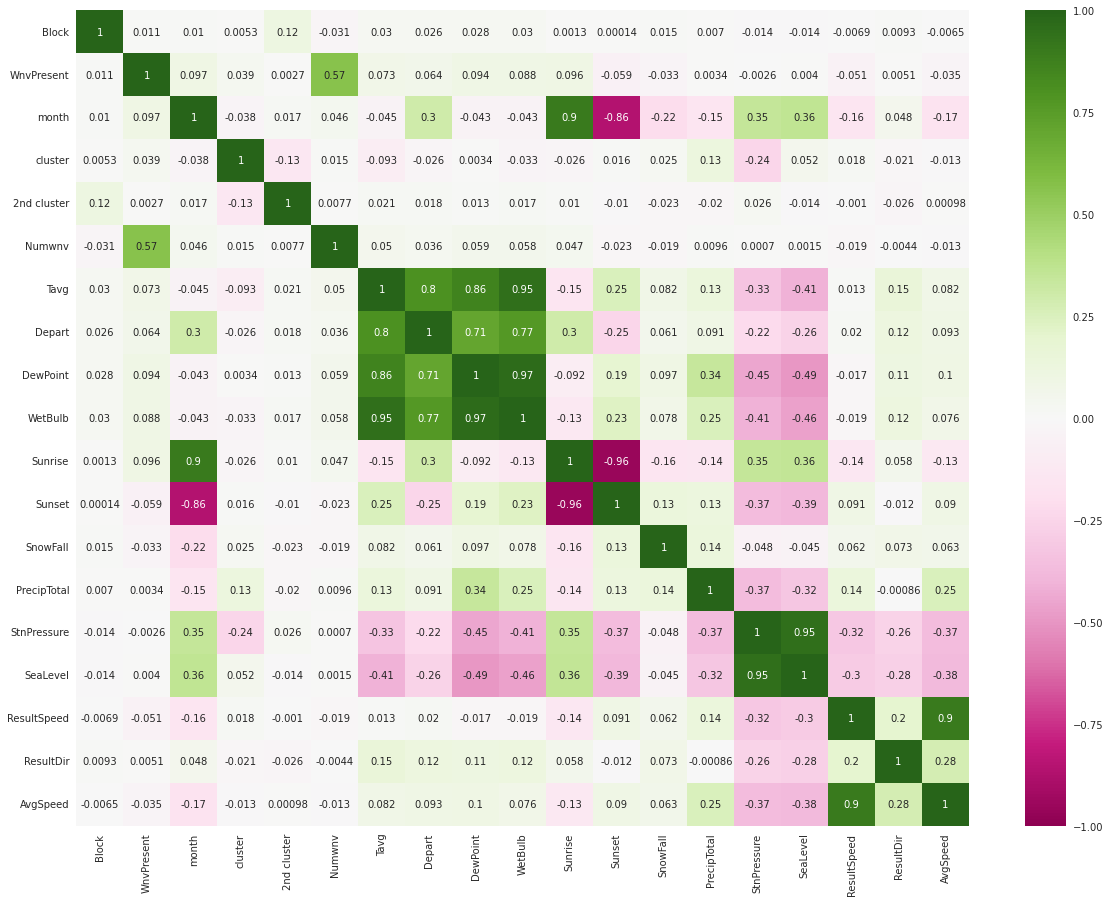

In [ ]:
# Looking for correlation between the different features 
features = df_merge.drop(columns=['Id','Longitude','Latitude','year','NumMosquitos','Water1','AddressAccuracy']).columns
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df_merge[features].corr(), annot=True, cmap='PiYG', vmin=-1, vmax=1)

#### Decision of dropping certain columns which have weak correlation with WmnPresent.

After looking at the heatmap, we have identified these columns- ['StnPressure','Depart','ResultDir']  to be dropped due to weak correlation (<=0.001). <br>

However, while 'PrecipTotal' has a weak correlation, it is a critical feature in identifying whether there is heavy rain or not, which is vital in determining mosquito activity (Mosquitoes are weak flying insects, if there is heavy rain, it will damage their wings thus heavy rain affects mosquitoes to staying indoor).Therefore, we will keep 'PrecipTotal' as one of the features.


In [ ]:
df_merge.drop(columns=['StnPressure','Depart','ResultDir'], inplace=True)

In [ ]:
df_merge

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,SeaLevel,ResultSpeed,AvgSpeed,Month
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11.0,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8.0,...,1917,BR HZ,0,NaN,0.0,0.0,30.09,5.8,7.4,May
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11.0,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8.0,...,1917,BR HZ,0,NaN,0.0,0.0,30.09,5.8,7.4,May
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11.0,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8.0,...,1917,BR HZ,0,NaN,0.0,0.0,30.09,5.8,7.4,May
3,2007-05-29,"1700 West 95th Street, Chicago, IL 60643, USA",CULEX RESTUANS,17.0,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9.0,...,1917,BR HZ,0,NaN,0.0,0.0,30.09,5.8,7.4,May
4,2007-05-29,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22.0,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8.0,...,1917,BR HZ,0,NaN,0.0,0.0,30.09,5.8,7.4,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71.0,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9.0,...,1742,BR,0,NaN,0.0,0.0,30.04,3.8,4.2,September
8606,2013-09-26,"9100 West Higgins Road, Rosemont, IL 60018, USA",CULEX RESTUANS,91.0,W HIGGINS RD,T009,"9100 W HIGGINS RD, Chicago, IL",41.992478,-87.862995,8.0,...,1742,BR,0,NaN,0.0,0.0,30.04,3.8,4.2,September
8607,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10.0,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9.0,...,1742,BR,0,NaN,0.0,0.0,30.04,3.8,4.2,September
8608,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10.0,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9.0,...,1742,BR,0,NaN,0.0,0.0,30.04,3.8,4.2,September


In [ ]:

#save our dataset for further processing (feature engineering)
df_merge.to_csv("/datasets/data/cleaned_traindf.csv", index=False)

## Test Dataset

In [ ]:
#create date fields
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['year'] = df_test['Date'].dt.year
df_test['month'] = df_test['Date'].dt.month

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date                    116293 non-null  datetime64[ns]
 1   Address                 116293 non-null  object        
 2   Species                 116293 non-null  object        
 3   Block                   116293 non-null  float64       
 4   Street                  116293 non-null  object        
 5   Trap                    116293 non-null  object        
 6   AddressNumberAndStreet  116293 non-null  object        
 7   Latitude                116293 non-null  float64       
 8   Longitude               116293 non-null  float64       
 9   AddressAccuracy         116293 non-null  float64       
 10  WnvPresent              0 non-null       float64       
 11  year                    116293 non-null  int64         
 12  month                   116293

In [ ]:
#merging test dataset with weather dataset
df_merge_test = pd.merge(left=df_test, right=df_weather, how="left", on=["Date",'cluster'])


In [ ]:
# following dropped columns from df_merge dataset
df_merge_test.drop(columns=['StnPressure','Depart','ResultDir'], inplace=True)


In [ ]:
#save our dataset for further processing (feature engineering)
df_merge_test.to_csv("/datasets/data/cleaned_testdf.csv", index=False)

### Spray Dataset

In [ ]:
train_test = df_merge.append([df_merge_test])
train_test.fillna(0,inplace=True)
train_test['year'] = pd.to_datetime(train_test['Date']).dt.year

In [ ]:
train_test

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,SeaLevel,ResultSpeed,AvgSpeed,Month
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11.0,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8.0,...,1917,BR HZ,0,0.0,0.0,0.00,30.09,5.8,7.4,May
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11.0,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8.0,...,1917,BR HZ,0,0.0,0.0,0.00,30.09,5.8,7.4,May
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11.0,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8.0,...,1917,BR HZ,0,0.0,0.0,0.00,30.09,5.8,7.4,May
3,2007-05-29,"1700 West 95th Street, Chicago, IL 60643, USA",CULEX RESTUANS,17.0,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9.0,...,1917,BR HZ,0,0.0,0.0,0.00,30.09,5.8,7.4,May
4,2007-05-29,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22.0,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8.0,...,1917,BR HZ,0,0.0,0.0,0.00,30.09,5.8,7.4,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116288,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX SALINARIUS,21.0,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8.0,...,1732,TSRA RA BR,0,0.0,0.0,0.32,29.78,7.2,7.9,October
116289,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX TERRITANS,21.0,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8.0,...,1732,TSRA RA BR,0,0.0,0.0,0.32,29.78,7.2,7.9,October
116290,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX TARSALIS,21.0,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8.0,...,1732,TSRA RA BR,0,0.0,0.0,0.32,29.78,7.2,7.9,October
116291,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",UNSPECIFIED CULEX,21.0,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8.0,...,1732,TSRA RA BR,0,0.0,0.0,0.32,29.78,7.2,7.9,October


In [ ]:
# merge with Spray dataset
df_spray['year'] = pd.to_datetime(df_spray['Date']).dt.year
cluster_spray = pd.unique(df_spray['2nd cluster'])
group_w_spray = train_test[(train_test['year']==2011) |(train_test['year']==2013)]
group_w_spray = group_w_spray.sort_values(['2nd cluster'],ascending=False).groupby(by=['2nd cluster','month','year']).sum()
group_wo_spray = train_test[(train_test['year']==2009) |(train_test['year']==2007) ]
group_wo_spray = group_wo_spray.sort_values(['2nd cluster'],ascending=False).groupby(by=['2nd cluster','month','year']).sum()


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


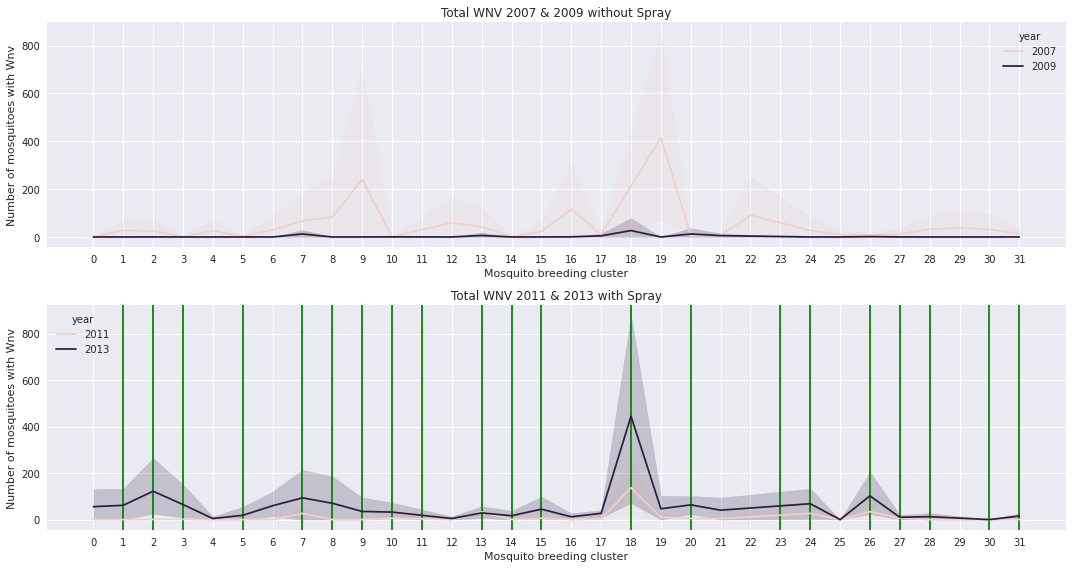

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(15,8))
ax[0].set_xticks(range(0,32))
ax[0].set_title('Total WNV 2007 & 2009 without Spray')
sns.lineplot(x='2nd cluster',y='Numwnv',data=group_wo_spray, hue='year',ax=ax[0])
ax[0].set_ylabel('Number of mosquitoes with Wnv')
ax[0].set_xlabel('Mosquito breeding cluster')

ax[1].set_xticks(range(0,32))
for cluster in cluster_spray:
    ax[1].axvline(x=cluster, color='green', ls='-')
ax[1].set_title('Total WNV 2011 & 2013 with Spray')
sns.lineplot(x='2nd cluster',y='Numwnv',data=group_w_spray, hue='year',ax=ax[1])
ax[1].set_ylabel('Number of mosquitoes with Wnv')
ax[1].set_xlabel('Mosquito breeding cluster')

plt.tight_layout()

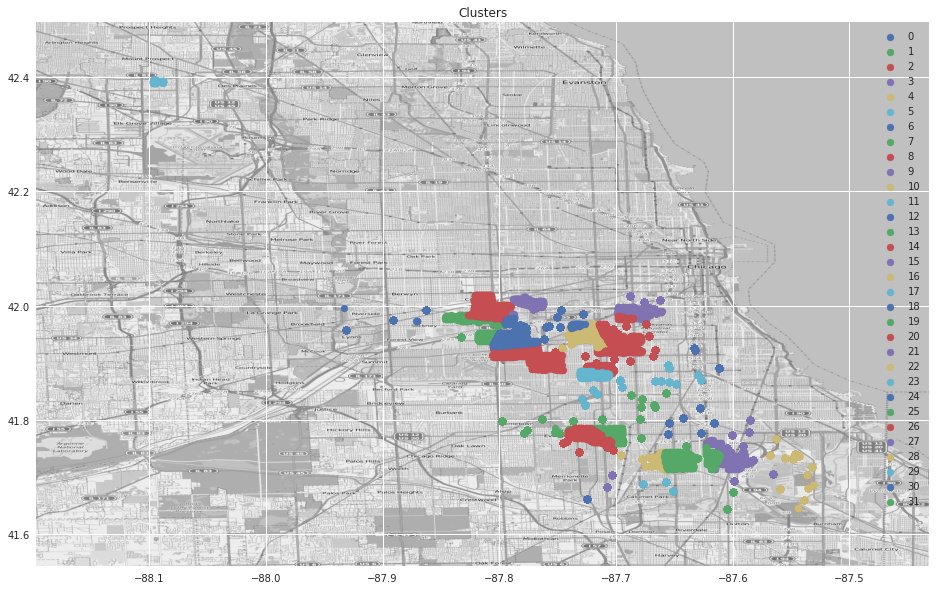

In [ ]:
#Visualize cluster areas to identify mosquito breeding 

#use map data provided by kaggle
mapdata = np.loadtxt('/datasets/data/mapdata_copyright_openstreetmap_contributors.txt')  

#set dimensions of the plot
lon_lat_box = (df_cls['Longitude'].min()-.1, df_cls['Longitude'].max()+.1
, df_cls['Latitude'].min()-.1, df_cls['Latitude'].max()+.1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,10))


#map
ax.imshow(mapdata, cmap=plt.get_cmap('gray'), aspect='auto', extent=lon_lat_box)

#data
#plot spray 2011
for i in range(0,32):  
    ax.scatter(df_cls[df_cls['2nd cluster'] == i]['Longitude'], 
               df_cls[df_cls['2nd cluster'] == i]['Latitude'], 
               label=i, marker='o')

#titles
ax.set_title('Clusters');


#show legend
ax.legend();


We have decided to drop the spray dataset and merge the training dataset with the weather dataset. 

This decision was made due to various reasons. 

1) Spray data was available for 2011 and 2013 only. 

2) It was noticed that clusters 18 had regular spraying but a spike in the number of mosquitoes with wnv was observed. Cluster 12 did not have any spraying as well but numbers for mosquitoes with wnv remain low. The results were unable to show whether spraying was effective in reducing number of mosquitoes with wnv.

3) However, it is still scientifically proven that mosquitoes numbers have reduced with regular spraying but it has no impact on the number of mosquitoes with wnv. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3abded61-2db4-446b-a02d-565b62921f1b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>